In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import numpy as np

Problem Statement:Suppose you are a public school administrator. Some schools in your state of Tennessee are performing below average academically. Your superintendent under pressure from frustrated parents and voters approached you with the task of understanding why these schools are under-performing. To improve school performance, you need to learn more about these schools and their students, just as a business needs to understand its own strengths and weaknesses and its customers. The data includes various demographic, school faculty, and income variables.
Objective:Perform exploratory data analysis which includes: determining the type of the data, correlation analysis over the same. You need to convert the data into useful information:

Read the data in pandas data frame

Describe the data to find more details

Find the correlation between ‘reduced_lunch’and‘school_rating’

In [2]:
#Steps:
#1.Import Datasets
#2.Examine the statistic of each variable 
#3.Extract the relevant variables - school_rating and reduced_lunch
#4.Examine the correlation between school_rating and reduced_lunch

In [3]:
df = pd.read_csv('middle_tn_schools.csv')

In [4]:
df.shape

(347, 15)

In [5]:
df.describe()

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
count,347.000000,347.000000,347.000000,347.000000,341.000000,347.000000,341.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,2.968300,699.472622,50.279539,58.801729,58.249267,15.461671,57.004692,57.049856,44.939481,21.197983,61.673487,2.642651,11.164553
std,1.690377,400.598636,25.480236,32.540747,32.702630,5.725170,26.696450,27.968974,22.053386,23.562538,27.274859,3.109629,12.030608
min,0.000000,53.000000,2.000000,0.200000,0.600000,4.700000,1.500000,0.100000,2.000000,0.000000,1.100000,0.000000,0.000000
25%,2.000000,420.500000,30.000000,30.950000,27.100000,13.700000,37.600000,37.000000,30.000000,3.600000,40.600000,0.750000,3.800000
50%,3.000000,595.000000,51.000000,66.400000,65.800000,15.000000,61.800000,60.700000,40.000000,13.500000,68.700000,1.600000,6.400000
75%,4.000000,851.000000,71.500000,88.000000,88.600000,16.700000,79.600000,80.250000,54.000000,28.350000,85.950000,3.100000,13.800000
max,5.000000,2314.000000,98.000000,99.800000,99.800000,111.000000,99.000000,98.900000,140.000000,97.400000,99.700000,21.100000,65.200000


In [6]:
df.columns

Index(['name', 'school_rating', 'size', 'reduced_lunch', 'state_percentile_16',
       'state_percentile_15', 'stu_teach_ratio', 'school_type', 'avg_score_15',
       'avg_score_16', 'full_time_teachers', 'percent_black', 'percent_white',
       'percent_asian', 'percent_hispanic'],
      dtype='object')

In [7]:
df.head()

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0


In [8]:
df[['reduced_lunch','school_rating']].groupby('school_rating').describe().unstack()

                      school_rating
reduced_lunch  count  0.0              43.000000
                      1.0              40.000000
                      2.0              44.000000
                      3.0              56.000000
                      4.0              86.000000
                      5.0              78.000000
               mean   0.0              83.581395
                      1.0              74.950000
                      2.0              64.272727
                      3.0              50.285714
                      4.0              41.000000
                      5.0              21.602564
               std    0.0               8.813498
                      1.0              11.644191
                      2.0              11.956051
                      3.0              13.550866
                      4.0              16.681092
                      5.0              17.651268
               min    0.0              53.000000
                      1.0        

<AxesSubplot:>

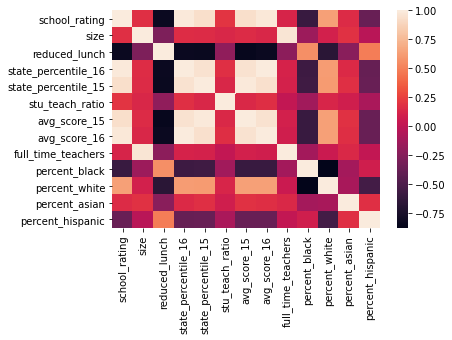

In [20]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix)

In [11]:
df[['reduced_lunch','school_rating']].corr()

,reduced_lunch,school_rating
reduced_lunch,1.000000,-0.815757
school_rating,-0.815757,1.000000


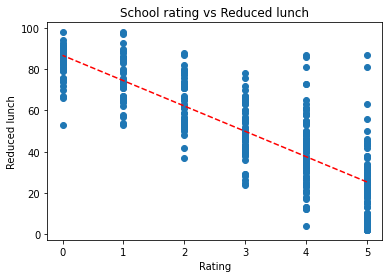

In [24]:
x = df["school_rating"]
y = df["reduced_lunch"]

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel("Rating")
plt.ylabel("Reduced lunch")
plt.title("School rating vs Reduced lunch")
plt.show()

Conclusion: We can see that reduced_lunch and school_rating are negatively correlated. School Rating is high when the reduced lunch is low. The slope of the trend line indicates how much school_rating decreases as reduced_lunch increases.